In [1]:
import tensorflow as tf
print(tf.__version__)

2.16.1


##  Import Basic Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Divide the dataset into Independent and Dependent Features

In [4]:
# Here the columns RowNumber, CustomerID, Surname are actually useless features they can't help in predicting so we will leave that
# 'Exited' - Dependent Feature

X = dataset.iloc[:,3:13]
y = dataset.iloc[:, 13]

## Feature Engineering

In [5]:
# As 'Geography' is a categorical data so we need to convert it to like something as ome hot encoding
# Similarly 'Gender' is also a categorical data so we need to convert it to like something as one hot encoding
# All other columns or features are of numerical value

geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)

# Setting drop_first=True will remove the first level (category) of each categorical variable, leaving only N-1 binary 
#      columns. 
# This can help mitigate multicollinearity issues. So if both are 0 then it will signify that it's the category which 
#      was dropped.
# Lets understand this with an example -- if there are three kind in 'Geography' named 'France' , 'Russia' & 'India
# Now if we would have done normal one hot encoding or kept " drop_first = False " then we would have three columns.
# But now what it will do is it will have only 2 columns 'Russia' & 'India' ,,,and when both of them will be '0', it 
#     will represent 'France'.

## Concatenate the new features

In [6]:
# Now we need to add this new 'geography' and 'gender' column to the data and drop the pervious ones
X = X.drop(['Geography','Gender'], axis = 1)
# axis = 1 signifies that only delete the col,,,not the rows associated with it

# concat them
X = pd.concat([X, geography, gender], axis = 1)

## Splitting the Data for Training and Testing

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

## Feature Scaling

In [8]:
# StandardScaler - ANN
# MinMaxScaler - CNN (Anything between 0 - 1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# When you call fit_transform() on the training set, the scaler (or any other preprocessing transformer) computes the mean, 
# standard deviation, or any other parameters needed for the transformation using only the training data. The purpose is to ensure 
# that the scaler learns the characteristics of the training set without incorporating information from the test set. This is 
# important to prevent data leakage, where information from the test set inadvertently influences the model training.
# After fitting the transformer on the training set, you want to apply the same transformation to both the training and test sets. 
# This is achieved using the transform() method. Applying the same transformation ensures that both sets are processed in a 
# consistent manner. For example, if you're standardizing features, you want to use the mean and standard deviation computed from 
# the training set for both the training and test sets. That's why we use sc.fit_transform() for training purpose and only 
# sc.transform() for test purpose as the parameters are already trained and mst be same as training one and 
# for "data leakage and maintaining consistency in preprocessing".

In [9]:
print("Train set Shape : ", X_train.shape)
print("Test set Shape : ", X_test.shape)

Train set Shape :  (8000, 11)
Test set Shape :  (2000, 11)


# Part 2 : Create the ANN

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, ELU, PReLU, ReLU
from tensorflow.keras.layers import Dropout

In [11]:
### Lets initialize the ANN

classifier = Sequential()

## Adding the Input Layer

In [12]:
# I need to add the inputs to the model classifier
# from tensorflow.keras.layers import Dense
# model.add(Dense(units, activation='relu', input_dim=input_dim))

# Dense is the standard fully connected neural network layer. It means that each neuron in the current layer is connected 
#    to every neuron in the previous layer.

# units: Number of neurons in the layer.
#        So it will be 11 as we have 11 independent features in our dataset.
# activation: Activation function applied to the output. 
#             We saw for Binary Classification problem 'ReLU' is best in hidden layer and 'Sigmoid' in Output Layer

classifier.add(Dense(units = 11, activation = 'relu'))

## Adding the First Hideen Layer

In [13]:
classifier.add(Dense(units = 7, activation = 'relu'))
classifier.add(Dropout(rate=0.3))

# Here I have take units = 7,,,I have taken this arbitarily,,,no logic behind this

## Adding the Second Hideen Layer

In [14]:
# There are techniques to find how many hideen layers we should use,, later on
classifier.add(Dense(units = 6, activation = 'relu'))

## Adding the Output Layer

In [15]:
# It is a Binary Classification problem so the activation function must be sigmoid and units = 1
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [16]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Here the adam optimizer takes learning rate as 0.01 by default,, if we want to provie our own learning rate then --
# from tensorflow.keras.optimizers import Adam
# classifier.compile(optimizer='adam'(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 1000)

In [18]:
# It shows that epoch = 1000 but in each epoch it is running for 536 times,, how?? 
# 8000 training data points,, validation = 33% means only 67% for training purpose,,, then (8000 * 67)/100 = 5360
# Now the batch size is 10 so 5360/10 = 536

In [19]:
# Why Early Stopping ??
#     If we run the above fit line then we can see that after aroun 80-90 epochs the accuracy is not at all increasing, it
#     has become constant or we can say that it has reached the best result and now it won't increase further. But the 
#     problem is that still it will run for 1000 epochs which is a huge waste of time. So that is why we need 
#     Early Stopping,,when the accuracy will not increase it become constant it will stop the Iteration.


import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [20]:
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7974 - loss: 0.5317 - val_accuracy: 0.7955 - val_loss: 0.4810
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.7880 - loss: 0.4809 - val_accuracy: 0.7955 - val_loss: 0.4528
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.7936 - loss: 0.4631 - val_accuracy: 0.7955 - val_loss: 0.4440
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.8001 - loss: 0.4273 - val_accuracy: 0.7955 - val_loss: 0.4386
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.7909 - loss: 0.4352 - val_accuracy: 0.7955 - val_loss: 0.4356
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.7920 - loss: 0.4253 - val_accuracy: 0.7955 - val_loss: 0.4395
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.7900 - loss: 0.4378 - val_accuracy: 0.7955 - val_loss: 0.4343
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.8037 - l

In [21]:
# Here we can see that because of Early Stopping it ran for only 56 epochs,,,and then it stopped
# If we would have avoided it then we had to wait for 944 more epochs to get the same result
# Our Efficiency Increased Rapidly

model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## Summarize History for Accuracy

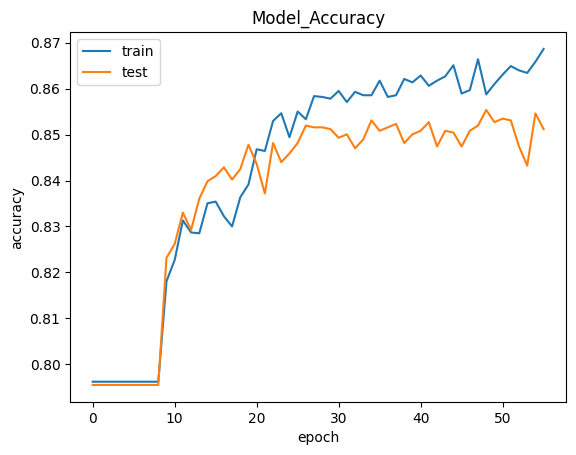

In [22]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

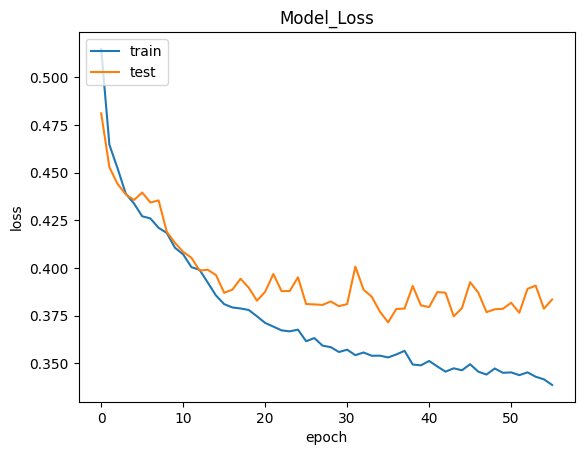

In [23]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model_Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

# Part - 3 : Making the Predictions and Evaluate

In [24]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step


## Make the Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1472  123]
 [ 172  233]]


## Calculate the Accuracy

In [26]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.8525


## Get the Weights

In [27]:
classifier.get_weights()

[array([[ 0.01622023, -0.44348207,  0.23021303,  0.32123566,  0.0766847 ,
          0.01829479, -0.0573286 ,  0.07503598, -0.04411404,  0.00683092,
         -0.4573099 ],
        [ 0.3444551 , -0.20924185,  0.14277747,  0.02521062, -0.09743566,
         -0.7125758 ,  0.1691986 , -0.830601  , -0.01760437,  0.01864939,
          0.23503257],
        [ 0.09491593,  0.16428033,  0.17010689, -0.0904194 , -0.00985109,
         -0.03425187,  0.18572983,  0.03423402,  0.103691  , -0.24000813,
          0.1776968 ],
        [-0.00993503,  0.11133846, -0.17492369, -0.44396782, -0.86517346,
          0.07601369,  0.20653361, -0.03382584, -0.41677725,  0.277908  ,
         -0.07663986],
        [ 0.03120898,  0.32746574, -0.14119965,  0.48733938,  0.04929563,
         -0.008603  ,  1.214267  ,  0.18154043, -1.3356245 ,  1.0774282 ,
          0.10131153],
        [ 0.32317287, -0.11560518, -0.07605238, -0.07959034,  0.06584001,
          0.03845469, -0.13066252, -0.05205361,  0.02842903,  0.0929004